1) Experimento incial - criação do baseline:
- Gerar o dataset sintético
- Injeta missing por algum mecanismo
- Realiza a Imputação para os 5 algoritmos (MEAN, MICE, KNN, PMIVAE, SAEI)
- Calcula MAE

Com baseline criado - testa para 5%, 10%, 25% de label noise sob NCAR (inverter aleatório):
2) Inejção de Label Noise:
- Aumenta o parâmetro flip
- Injeta o mesmo mecanismo missing do baseline
- Realiza a Imputação para os 5 algoritmos (MEAN, MICE, KNN, PMIVAE, SAEI)
- Calcula MAE
- Avalia os resultados

3) Attribute Noise:
- Como gerar ruído nos atributos
- Injeta ruído 
- Injeta o mesmo mecanismo missing do baseline
- Realiza a Imputação para os 5 algoritmos (MEAN, MICE, KNN, PMIVAE, SAEI)
- Calcula MAE
- Avalia os resultados

4) Último cenário que é a proposta de pesquisa:
- Injeta Attribute Noise
- Filtra, realiza um pré-processamentos dos dados
- Injeta missing por algum mecanismo
- Realiza a Imputação para os 5 algoritmos (MEAN, MICE, KNN, PMIVAE, SAEI)
- Calcula MAE

Hipótese: espera-se que o ruído degrade a performance  na imputação/classificação

In [12]:
from sklearn.datasets import make_blobs, make_classification
import matplotlib.pyplot as  plt 
from mdatagen.univariate.uMAR import uMAR
import pandas as pd
import numpy as np 

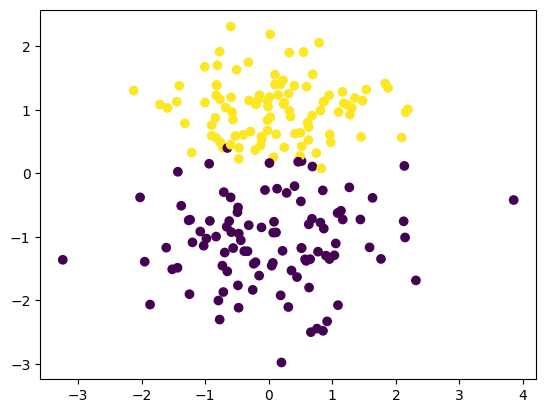

In [9]:
X,y = make_classification(n_samples=200, n_features=2, n_informative=1, n_redundant=0, n_classes=2, random_state=42, n_clusters_per_class=1)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')

In [10]:
df = pd.DataFrame(X, columns=["Att1", "Att2"])
df["target"] = y

In [20]:
# Gaussian Noise
def generate_gaussian_noise(dataset:pd.DataFrame, column:str)-> float:
    """Função para gerar um ruído Gaussiano respeitando o máximo e mínimo 
    da coluna do dataset
    
    Args:
        dataset (pd.DataFrame): pandas Dataframe
        column (str): a coluna do dataset para gerar o noise
    
    Returns:
        noise (float): ruído gaussiano para a coluna do dataset
    """

    col_mean = dataset[column].mean()
    col_std = dataset[column].std()
    max_val = dataset[column].max()
    min_val = dataset[column].min()
    noise = np.random.normal(col_mean, col_std)

    if noise > max_val:
        noise = max_val
    elif noise < min_val:
        noise = min_val

    return noise



Média: 0.0703063140565532
Std: 0.994472564212945
Máximo: 3.852731490654721
Mínimo: -3.2412673400690726
Noise: -0.09791271872154238
